## Case No 2 : MultiLayer Perceptron Model - Regression Problem

### Boston Housing Price Dataset by Multilayer perceptron

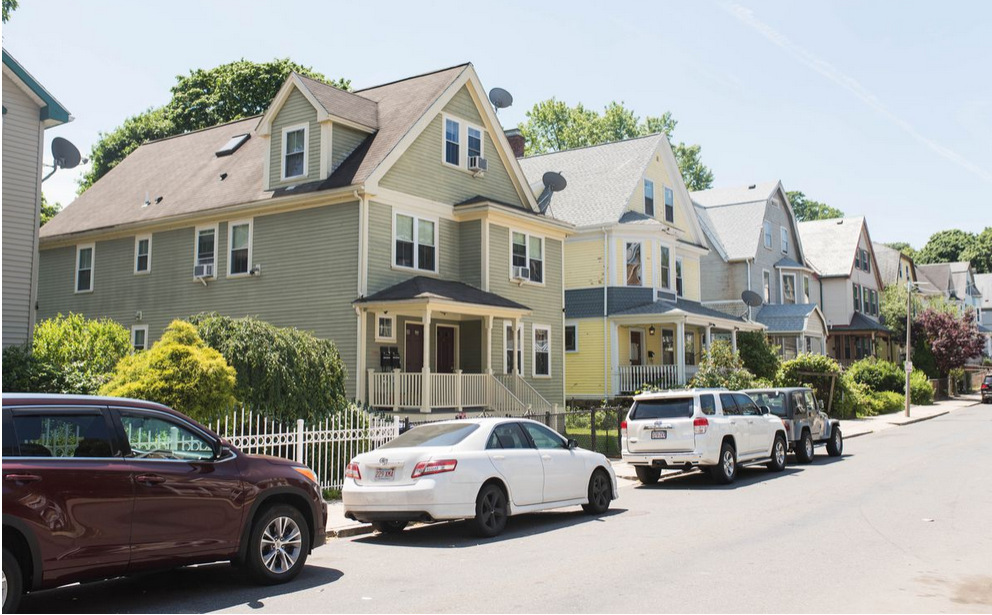

### Data Dictionary

#### CRIM - per capita crime rate by town
#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#### INDUS - proportion of non-retail business acres per town.
#### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#### NOX - nitric oxides concentration (parts per 10 million)
#### RM - average number of rooms per dwelling
#### AGE - proportion of owner-occupied units built prior to 1940
#### DIS - weighted distances to five Boston employment centres
#### RAD - index of accessibility to radial highways
#### TAX - full-value property-tax rate per 10,000(doller)
#### PTRATIO - pupil-teacher ratio by town
#### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### LSTAT - % lower status of the population
#### MEDV - Median value of owner-occupied homes in 1000(dollers)


#### Import basic packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.16.1'

#### Import dataset

In [3]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\HousingData.csv')

In [4]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


### Data Preprocessing

#### Checking Missing values

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

#### Insights : missing values are exist in dataset

#### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### Handling Missing values by knn imputaion

In [7]:
from sklearn.impute import KNNImputer

In [8]:
knn = KNNImputer()

In [9]:
df = pd.DataFrame(knn.fit_transform(df) ,columns = df.columns)

In [10]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


#### Crosss check after imputing values

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Split the data into independent and dependent variable

In [12]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [13]:
x.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [14]:
pd.DataFrame(y.head(2))

,MEDV
0,24.0
1,21.6


### Whenever do it neural network make sure you need to perform feature Scaling (Its a mandetory)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)

In [18]:
df1 = pd.concat([x_scaled , y] , axis = 1)

In [19]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.425438,0.287980,-1.291623,-0.280228,-0.144217,0.413672,-0.125945,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.085232,24.0
1,-0.423028,-0.488492,-0.595127,-0.280228,-0.740262,0.194274,0.368604,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.498835,21.6
2,-0.423030,-0.488492,-0.595127,-0.280228,-0.740262,1.282714,-0.273949,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.219144,34.7
3,-0.422447,-0.488492,-1.310645,-0.280228,-0.835284,1.016303,-0.826256,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.372791,33.4
4,-0.418235,-0.488492,-1.310645,-0.280228,-0.835284,1.228577,-0.523029,1.077737,-0.752922,-1.106115,0.113032,0.441052,-0.721553,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.418972,-0.488492,0.116000,-0.280228,0.158124,0.439316,0.014839,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.465005,22.4
502,-0.420966,-0.488492,0.116000,-0.280228,0.158124,-0.234548,0.289187,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.507293,20.6
503,-0.419187,-0.488492,0.116000,-0.280228,0.158124,0.984960,0.805396,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.992198,23.9
504,-0.413580,-0.488492,0.116000,-0.280228,0.158124,0.725672,0.744028,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.873791,22.0


#### In Machine Learning , We perform feature scaling after train test split but not in DL.You can do it in DL before it.Here no issue of Data Leakage

#### Data split into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size = 0.2 , random_state = 1)

In [22]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### Building MultiLayer Perceptron Model with Regression

#### Import Basic package for Neural Netwrok (Deep Learning)

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#### Initialise equential model

In [24]:
model = Sequential()

#### 1st hidden layer fully connected 

In [25]:
model.add(Dense(units = 32 , activation = 'relu' , input_dim = len(x_scaled.columns)))

####  2nd hidden layer fully connected

In [26]:
model.add(Dense(units = 16 ,  activation = 'relu'))

#### Insights : Units is nothing but neurons and input_dim is input data (input columns values) and in 2nd hidden layer there is no need to give input dim because in 1st hidden layer provide input data to neurons so it create output. there is no need to give explicitely

#### Output Layer

In [27]:
model.add(Dense(units = 1 , activation = 'linear'))

#### Insights : In output layer , final neuron is 1 and activation function is linear (becuase its regression problem)

####  Calculate parameters by using sequential model

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

#### weight = i/p * neurons
#### paramter = weight + Bias

### Compile the model

In [29]:
model.compile(optimizer = 'adam' , loss = 'mse')

#### Compile is for evaluation of model

### Fit the model

#### Get training error and testing error from here over 100 epochs

In [30]:
history = model.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 100 , batch_size = 32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 635.6750 - val_loss: 599.1983
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 542.3573 - val_loss: 574.5472
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 569.8541 - val_loss: 548.0303
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 514.5017 - val_loss: 515.3326
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 467.3108 - val_loss: 475.0936
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 431.7490 - val_loss: 424.7816
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 420.8164 - val_loss: 366.6579
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 312.4306 - val_loss: 303.9776
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255.0161 - val_loss: 240.1205
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 183.6413 - val_loss: 181.5567
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.5912 - val_loss: 134.2527
Epoch 12/100


Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.0769 - val_loss: 12.8304
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3612 - val_loss: 12.7411
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9970 - val_loss: 12.4769
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.7816 - val_loss: 12.1934
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.7323 - val_loss: 12.3036
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.4104 - val_loss: 12.0373
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.8747 - val_loss: 12.0195
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7564 - val_loss: 11.9130
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4967 - val_loss: 11.9512
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9737 - val_loss: 11.8575
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.7346 - val_loss: 11.6607
Epoch 79/100
13/13 ━━━━━━━━━━

#### Prediction on train data

In [31]:
y_train_pred = model.predict(x_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [32]:
print(y_train_pred)

[[26.899311 ]
 [21.848612 ]
 [ 9.629947 ]
 [18.425348 ]
 [16.92005  ]
 [32.26271  ]
 [26.050568 ]
 [25.772068 ]
 [42.83917  ]
 [27.326752 ]
 [11.87508  ]
 [33.795345 ]
 [37.67685  ]
 [32.993652 ]
 [21.842531 ]
 [17.636972 ]
 [34.980747 ]
 [48.465332 ]
 [20.425976 ]
 [12.711844 ]
 [32.027885 ]
 [18.41843  ]
 [25.251392 ]
 [18.579681 ]
 [25.182295 ]
 [22.812252 ]
 [20.809336 ]
 [27.428747 ]
 [21.66935  ]
 [20.524126 ]
 [25.747574 ]
 [12.194803 ]
 [23.911726 ]
 [32.072315 ]
 [14.463462 ]
 [13.93393  ]
 [39.914383 ]
 [11.362812 ]
 [21.011086 ]
 [15.599832 ]
 [19.398155 ]
 [27.142996 ]
 [32.714375 ]
 [19.548927 ]
 [23.927656 ]
 [16.65313  ]
 [29.73249  ]
 [19.909443 ]
 [35.64042  ]
 [15.117917 ]
 [18.445454 ]
 [14.847154 ]
 [14.381097 ]
 [29.880678 ]
 [33.502327 ]
 [25.584621 ]
 [22.19731  ]
 [25.73056  ]
 [42.230385 ]
 [34.82594  ]
 [26.183796 ]
 [17.988785 ]
 [21.349531 ]
 [21.994543 ]
 [24.248985 ]
 [ 8.828956 ]
 [16.372156 ]
 [24.440598 ]
 [22.771383 ]
 [18.30424  ]
 [14.288116 ]
 [32.3

#### Prediction of test data

In [33]:
y_test_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [34]:
print(y_test_pred)

[[28.980404 ]
 [21.410534 ]
 [19.572403 ]
 [22.018238 ]
 [25.187553 ]
 [18.741123 ]
 [30.830704 ]
 [16.077684 ]
 [20.456427 ]
 [27.154814 ]
 [28.673964 ]
 [26.022938 ]
 [16.922832 ]
 [21.009998 ]
 [19.975342 ]
 [19.363304 ]
 [10.78502  ]
 [47.28593  ]
 [26.5323   ]
 [14.345798 ]
 [15.987569 ]
 [15.152446 ]
 [22.02915  ]
 [24.734335 ]
 [28.735767 ]
 [10.082971 ]
 [14.702531 ]
 [18.42793  ]
 [39.639748 ]
 [15.131364 ]
 [23.175434 ]
 [13.927724 ]
 [46.15521  ]
 [15.057916 ]
 [18.966347 ]
 [18.953125 ]
 [14.7096615]
 [30.91046  ]
 [15.909181 ]
 [19.175938 ]
 [23.68986  ]
 [22.335358 ]
 [27.124495 ]
 [14.6245165]
 [17.010529 ]
 [ 9.072258 ]
 [44.845394 ]
 [14.829391 ]
 [23.291513 ]
 [23.091736 ]
 [24.668503 ]
 [20.809402 ]
 [26.421497 ]
 [24.987629 ]
 [12.311753 ]
 [20.634241 ]
 [11.256409 ]
 [24.440105 ]
 [16.192945 ]
 [42.45489  ]
 [17.357265 ]
 [28.727474 ]
 [15.41668  ]
 [17.369524 ]
 [19.883173 ]
 [35.73811  ]
 [43.777325 ]
 [21.561773 ]
 [22.10905  ]
 [21.63369  ]
 [23.59907  ]
 [ 9.1

####  Insights : Loss (Training Error) is 8.4497 and val_loss (Testing Error) is 11.5008

#### Test data from client (where o/p is not there)

In [35]:
new_data = pd.read_excel('C:\\Users\\Lenovo\\Downloads\\Housing_data_Test.xlsx')

In [36]:
new_data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.009,13,3,1,0.9,7,50,3.9,1,325,17,450,6
1,1,0.090,14,5,0,0.8,8,65,6.0,2,400,16,430,7
2,2,0.070,17,6,1,0.7,9,54,8.0,2,400,19,288,8


In [37]:
new_data = new_data.iloc[: , 1:]

In [38]:
new_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.009,13,3,1,0.9,7,50,3.9,1,325,17,450,6
1,0.090,14,5,0,0.8,8,65,6.0,2,400,16,430,7
2,0.070,17,6,1,0.7,9,54,8.0,2,400,19,288,8


#### If any data is come follow the mandetory steps like feature scaling and others

In [39]:
new_data.shape

(3, 13)

#### Feature Scaling of new data

In [40]:
new_scaled_data = pd.DataFrame(scaler.transform(new_data) , columns = new_data.columns)

In [41]:
new_scaled_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.425130,0.072293,-1.190660,3.702785,2.982858,1.019152,-0.674642,0.049893,-0.982843,-0.494369,-0.672984,1.023259,-0.941452
1,-0.415830,0.115431,-0.898015,-0.280228,2.119025,2.443811,-0.133165,1.048169,-0.867883,-0.048923,-1.135347,0.803972,-0.800491
2,-0.418126,0.244843,-0.751693,3.702785,1.255192,3.868469,-0.530248,1.998907,-0.867883,-0.048923,0.251741,-0.752967,-0.659530


#### Prediction of new test data (client data)

In [42]:
y_pred_new_data = model.predict(new_scaled_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [43]:
y_pred_new_data

array([[19.6675  ],
       [28.27138 ],
       [28.318634]], dtype=float32)

#### This is house price of new data 